# K-Nearest Neighbors

Nearest neighbors provide a model by which you can infer what a data point will be based on the values of its neighbors.  For example, if you want to predict how a person will vote and do not currently know that person's voting patterns, you can make an inference about their voting patterns by looking at the voting patterns of their neighbors.

Nearest neighbor models are simple.  They make no mathematical assumptions.  All it requires are:

- some notion of distance
- an assumption that points that are close to one another are similar

Nearest neighbors do have some shortcomings.  They don't reveal the drivers behind a data point's value.  

Data points will have labels.  Their values could be binary or categorical.  To demonstrate, let's begin with an example that determines voting patterns:

In [4]:
from collections import Counter
from code_python3.linear_algebra import distance
from code_python3.stats import mean
import math
import random
import matplotlib.pyplot as plt

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

But this doesn't do anything with ties.  For example, if we were rating movies, and the five nearest movies are rated G, G, PG, PG and R, the G has two votes and PG also has two votes.  If that is the case, we have a number of options:

- Pick one of the winners at random
- Weight the votes by distance and pick the weighted winner
- Reduce `k` until we find a unique winner

Here's what the third implementation looks like:

In [5]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

This approach would be the most effective since it will eventually get to the correct answer.  With the following function, it's easy to create a classifier:

In [6]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

Let's take a look at how this works.  In this example, we are going to show favorite languages by region:

In [8]:
cities = [
    (-86.75,33.5666666666667,'Python'),
    (-88.25,30.6833333333333,'Python'),
    (-112.016666666667,33.4333333333333,'Java'),
    (-110.933333333333,32.1166666666667,'Java'),
    (-92.2333333333333,34.7333333333333,'R'),
    (-121.95,37.7,'R'),
    (-118.15,33.8166666666667,'Python'),
    (-118.233333333333,34.05,'Java'),
    (-122.316666666667,37.8166666666667,'R'),
    (-117.6,34.05,'Python'),
    (-116.533333333333,33.8166666666667,'Python'),
    (-121.5,38.5166666666667,'R'),
    (-117.166666666667,32.7333333333333,'R'),
    (-122.383333333333,37.6166666666667,'R'),
    (-121.933333333333,37.3666666666667,'R'),
    (-122.016666666667,36.9833333333333,'Python'),
    (-104.716666666667,38.8166666666667,'Python'),
    (-104.866666666667,39.75,'Python'),
    (-72.65,41.7333333333333,'R'),
    (-75.6,39.6666666666667,'Python'),
    (-77.0333333333333,38.85,'Python'),
    (-80.2666666666667,25.8,'Java'),
    (-81.3833333333333,28.55,'Java'),
    (-82.5333333333333,27.9666666666667,'Java'),
    (-84.4333333333333,33.65,'Python'),
    (-116.216666666667,43.5666666666667,'Python'),
    (-87.75,41.7833333333333,'Java'),
    (-86.2833333333333,39.7333333333333,'Java'),
    (-93.65,41.5333333333333,'Java'),
    (-97.4166666666667,37.65,'Java'),
    (-85.7333333333333,38.1833333333333,'Python'),
    (-90.25,29.9833333333333,'Java'),
    (-70.3166666666667,43.65,'R'),
    (-76.6666666666667,39.1833333333333,'R'),
    (-71.0333333333333,42.3666666666667,'R'),
    (-72.5333333333333,42.2,'R'),
    (-83.0166666666667,42.4166666666667,'Python'),
    (-84.6,42.7833333333333,'Python'),
    (-93.2166666666667,44.8833333333333,'Python'),
    (-90.0833333333333,32.3166666666667,'Java'),
    (-94.5833333333333,39.1166666666667,'Java'),
    (-90.3833333333333,38.75,'Python'),
    (-108.533333333333,45.8,'Python'),
    (-95.9,41.3,'Python'),
    (-115.166666666667,36.0833333333333,'Java'),
    (-71.4333333333333,42.9333333333333,'R'),
    (-74.1666666666667,40.7,'R'),
    (-106.616666666667,35.05,'Python'),
    (-78.7333333333333,42.9333333333333,'R'),
    (-73.9666666666667,40.7833333333333,'R'),
    (-80.9333333333333,35.2166666666667,'Python'),
    (-78.7833333333333,35.8666666666667,'Python'),
    (-100.75,46.7666666666667,'Java'),
    (-84.5166666666667,39.15,'Java'),
    (-81.85,41.4,'Java'),
    (-82.8833333333333,40,'Java'),
    (-97.6,35.4,'Python'),
    (-122.666666666667,45.5333333333333,'Python'),
    (-75.25,39.8833333333333,'Python'),
    (-80.2166666666667,40.5,'Python'),
    (-71.4333333333333,41.7333333333333,'R'),
    (-81.1166666666667,33.95,'R'),
    (-96.7333333333333,43.5666666666667,'Python'),
    (-90,35.05,'R'),
    (-86.6833333333333,36.1166666666667,'R'),
    (-97.7,30.3,'Python'),(-96.85,32.85,'Java'),
    (-95.35,29.9666666666667,'Java'),
    (-98.4666666666667,29.5333333333333,'Java'),
    (-111.966666666667,40.7666666666667,'Python'),
    (-73.15,44.4666666666667,'R'),
    (-77.3333333333333,37.5,'Python'),
    (-122.3,47.5333333333333,'Python'),
    (-89.3333333333333,43.1333333333333,'R'),
    (-104.816666666667,41.15,'Java')
]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

We will make an assumption that we can predict the favorite languages of locations that weren't surveyed.  Let's plot the data:

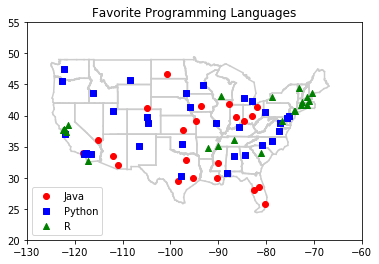

In [15]:
import re

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("code_python3/states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)
        
def plot_cities():

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()
    
plot_cities()

Since it looks like nearby places tend to like the same language, k-nearest neighbors seems like a good predictive model.  Let's see what happens if we try to predict each city's preferred language using its neighbors other than itself:

In [16]:
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0

    for location, actual_language in cities:

        other_cities = [other_city
                        for other_city in cities
                        if other_city != (location, actual_language)]

        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


What we did was test multiple nearest neighbor models.  We ran four models, using varying `k` amounts of neighbors, and the results show that using 3 neighbors seems to be provide the most accuracy.  Now we can see what region would be classified to which language under each model:

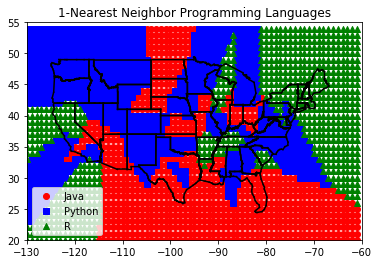

In [18]:
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(plt, color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

classify_and_plot_grid()

with `k=1` we see lots of abrupt changes with jagged lines.  Let's looks at `k=3`:

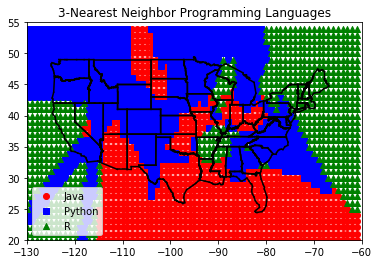

In [19]:
classify_and_plot_grid(k=3)

And `k=5`:

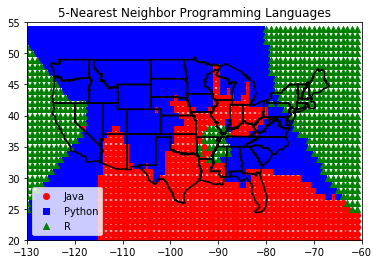

In [20]:
classify_and_plot_grid(k=5)

As you can see, the grid begins to get fuzzier as you increase `k` amounts of neighbors for polling of information.

k-nearest neighbor runs into trouble in higher dimensions thanks to 'the curse of dimensionality'.  High-dimensional spaces are vast, and points in high-dimensional spaces tend not to be close to one another at all.  One way to see this is by randomly generating pairs of points in the d-dimensional 'unit cube' in a variety of dimensions, and calculating the distances between them:

1 7.947421226228712e-06 0.3310009902894413 2.4010264196729895e-05
6 0.18647467260473205 0.9677679968196268 0.19268530600055306
11 0.315888574043911 1.3334395796543002 0.23689755341281116
16 0.7209190490469604 1.6154152410436047 0.4462747600308797
21 0.9694045860570238 1.8574960773724116 0.5218878240800003
26 1.1698067560262715 2.0632214700056446 0.5669807013122402
31 1.2930748713962408 2.257299829279505 0.5728414340991512
36 1.5123637311959328 2.437670913316559 0.620413413038717
41 1.5514668006745476 2.6039686964057926 0.5958085451703037
46 1.6688006850159558 2.756796053135482 0.6053406392242623
51 2.0135369208019926 2.902997336534375 0.6936061895274667
56 2.1422705294432887 3.0461953095695335 0.7032610557548324
61 2.2891825062886793 3.1783717877656223 0.720237486092828
66 2.3805561409678484 3.305579571524835 0.7201630121006946
71 2.428355816745725 3.4329484139337785 0.7073674066552892
76 2.5356413086431617 3.558475062222762 0.7125640237195596
81 2.682272988673655 3.669873368578009 0.7

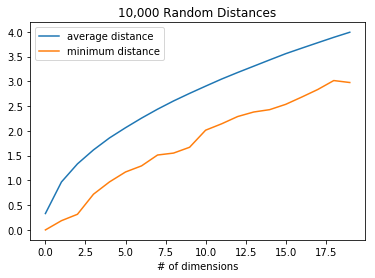

In [28]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

dimensions = range(1, 101, 5)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000)  # 10,000 random pairs
    avg_distances.append(mean(distances))     # track the average
    min_distances.append(min(distances))      # track the minimum
    print(dim, min(distances), mean(distances), min(distances) / mean(distances))
    
plt.plot(avg_distances, label='average distance')
plt.plot(min_distances, label='minimum distance')
plt.title('10,000 Random Distances')
plt.legend()
plt.xlabel('# of dimensions')
plt.show()

As the number of dimensions increases, the average distance between points increases.  But what's problematic is the ratio between the closest distance and the average distance:

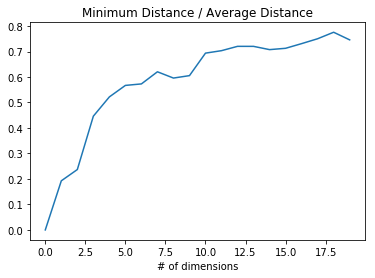

In [31]:
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]

plt.plot(min_avg_ratio)
plt.title('Minimum Distance / Average Distance')
plt.xlabel('# of dimensions')
plt.show()

In low-dimensional data sets, the closest points tend to be much closer than average.  But two points are close only if they're close in every dimension, and every extra dimension is another opportunity for each point to be further away from every other point.  When you have a lot of dimensions, it's likely that the closest points aren't much closer than average, which means that two points being close doesn't mean very much.